<a href="https://colab.research.google.com/github/LuciusMelillo09/DataScience/blob/main/Unit6/Luci_MeliUnit6Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import graphviz as gv
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install bambi
import arviz as az
import matplotlib.pyplot as plt
import bambi as bmb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.9/218.9 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.4/259.4 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.6/164.6 kB 12.0 MB/s eta 0:00:00


In [ ]:
!pip install bambi

In [ ]:
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

#Introduction

In this project, I will attempt to predict the Weight for different fish species, by using their physical measurements, such as Length and Width

In [ ]:
data = 'https://raw.githubusercontent.com/LuciusMelillo09/DataScience/main/Unit6/goog4_request%26X-Goog-Date%3D20260130T194902Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4c36c553d7223629a7c207f31415cbdda57f2e26b110ad6b0f0eaa6d0e3ee512419598000f763f968a7b261bd26e676e502e5e89342f029cf5f33ae51918f56da9c5.csv'
data2 = pd.read_csv(data)
data2

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


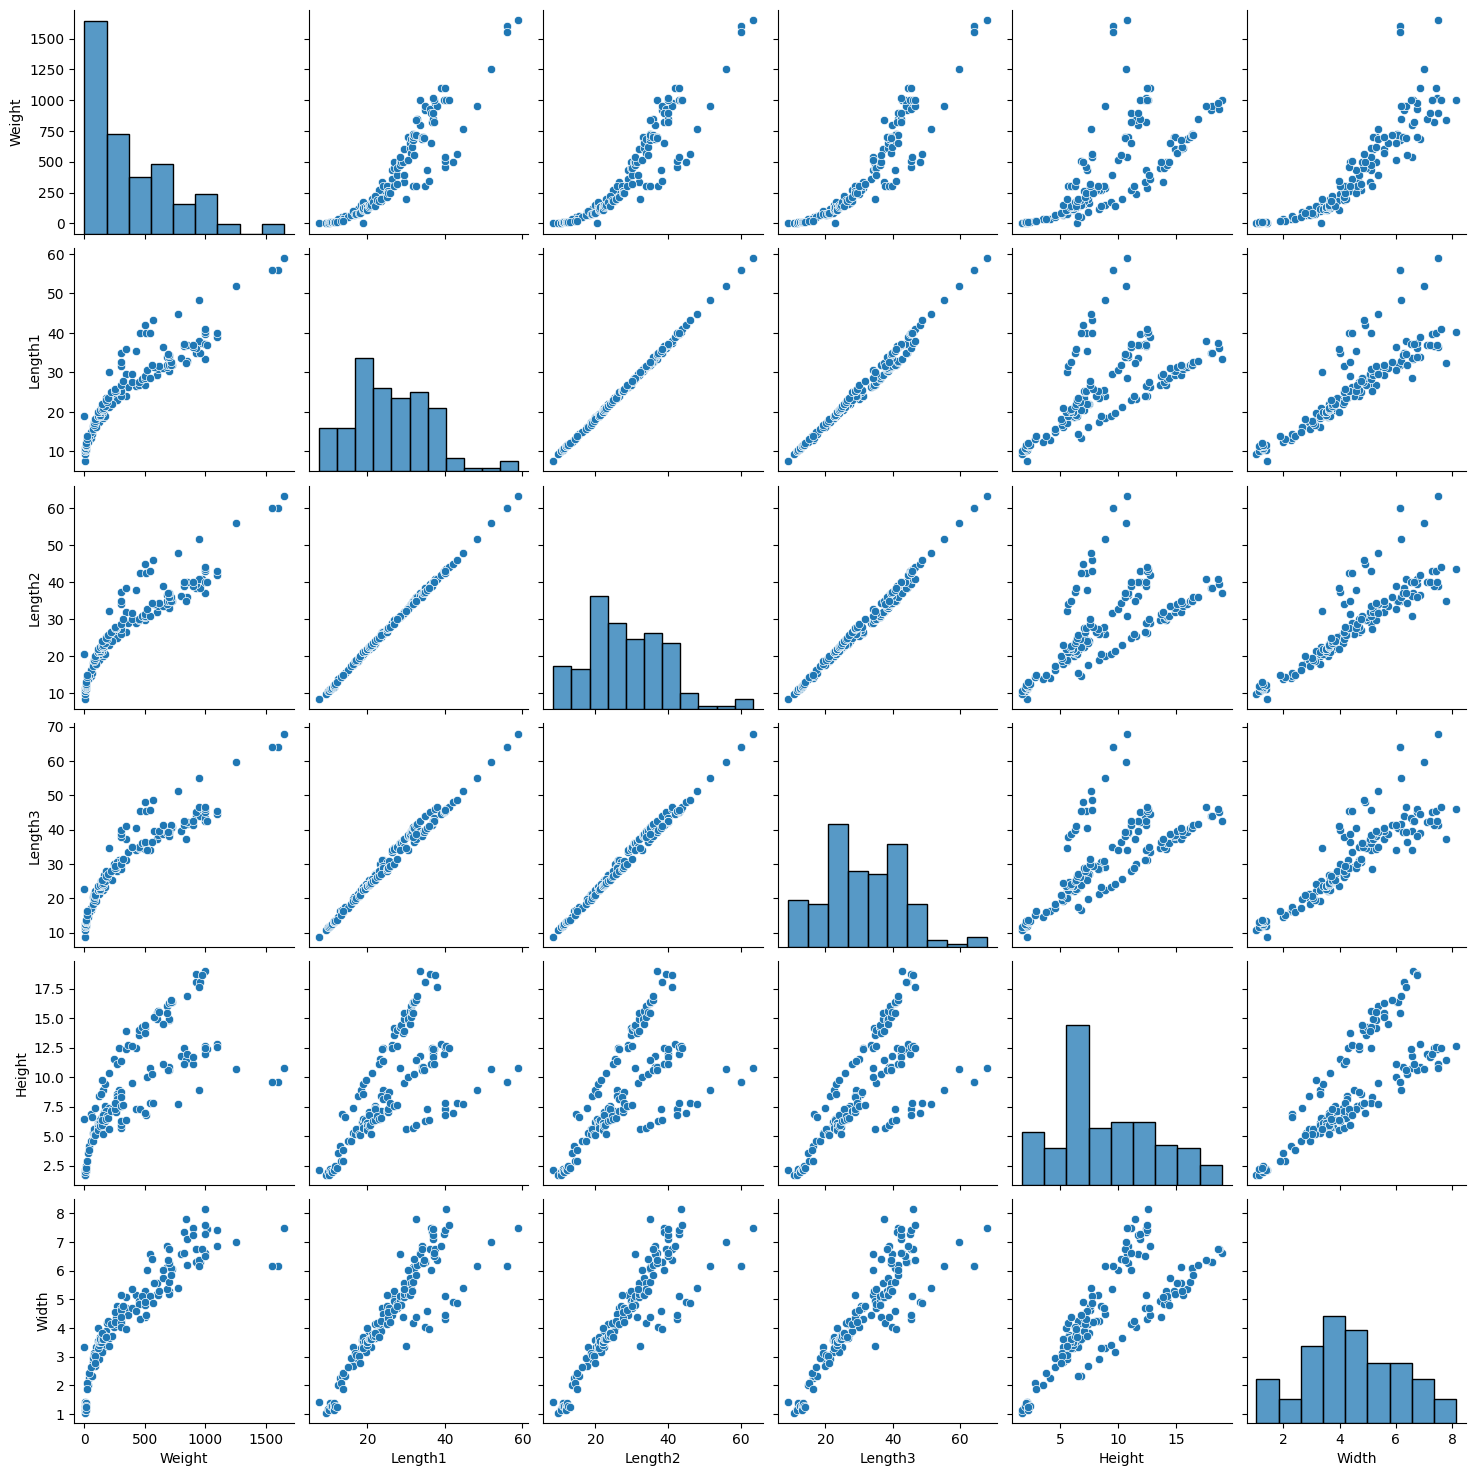

In [ ]:
sns.pairplot(data2)


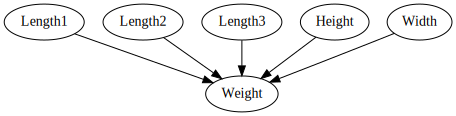

In [ ]:
dag_b = gv.Digraph(comment='fish')

dag_b.node('L', 'Length1')
dag_b.node('M','Length2')
dag_b.node('N', 'Length3')
dag_b.node('H','Height')
dag_b.node('X','Width')
dag_b.node('W','Weight')




dag_b.edges(['LW', 'MW', 'NW', 'HW', 'XW',])

dag_b

First, I created a model that predicts the `Weight` of the fish using `Length1` and `Species` as independent variables, using a simple linear model.

Gemini used code below to help me use Gamma, wasn't working before.


In [ ]:
model = bmb.Model("Weight ~ Length1 + Species", data=data2_filtered)
idata = model.fit(idata_kwargs={'log_likelihood': True})

(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='Length1', ylabel='Weight'>], dtype=object))

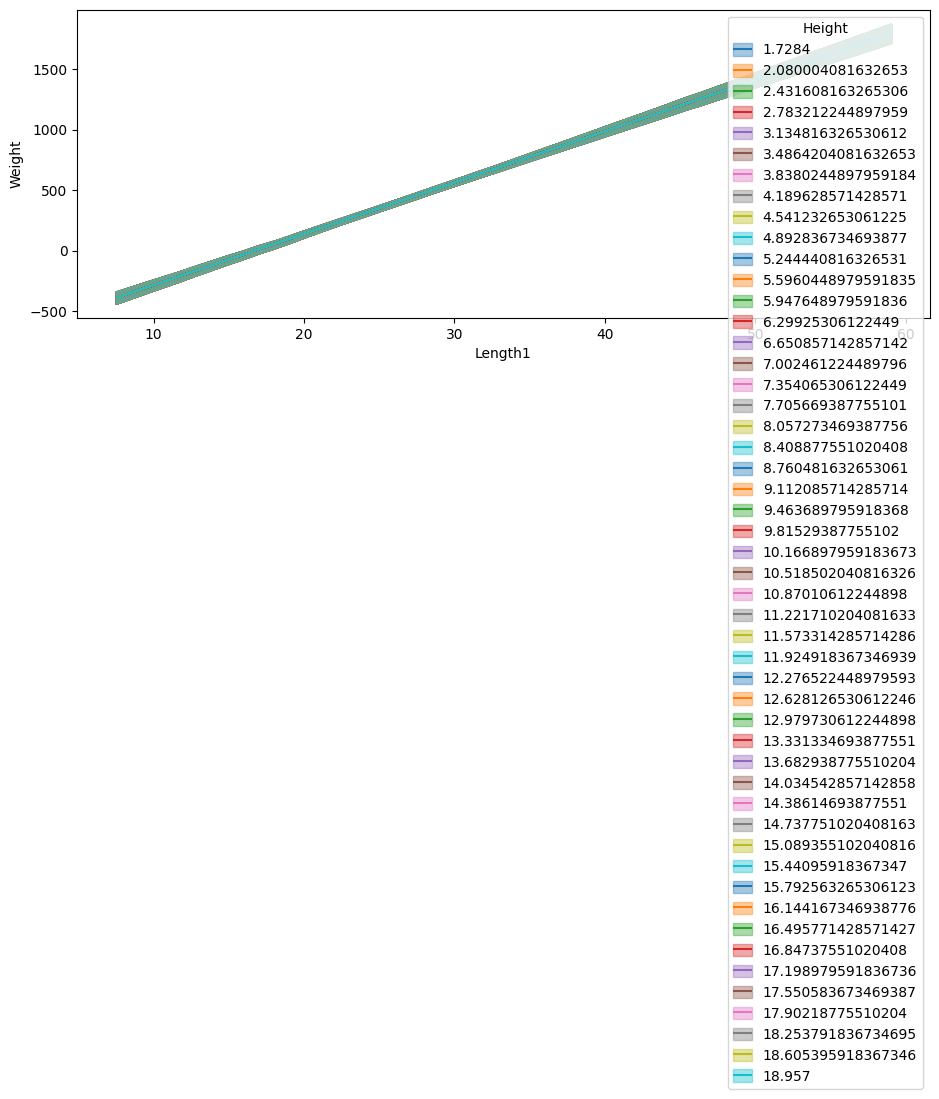

In [ ]:
bmb.interpret.plot_predictions(model, idata, ["Length1","Height"], fig_kwargs={"figsize":(11, 4)})

Then, I created a model that predicts the `Weight` of the fish using `Length1`, with a varying intercept and a varying slope for `Length1` across different `Species`. This allows the relationship between `Length1` and `Weight` to differ for each species.

In [ ]:
model2 = bmb.Model("Weight ~ Length1 + (Length1|Species)", data=data2_filtered)
idata2 = model2.fit(idata_kwargs={'log_likelihood': True})

(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='Length1', ylabel='Weight'>], dtype=object))

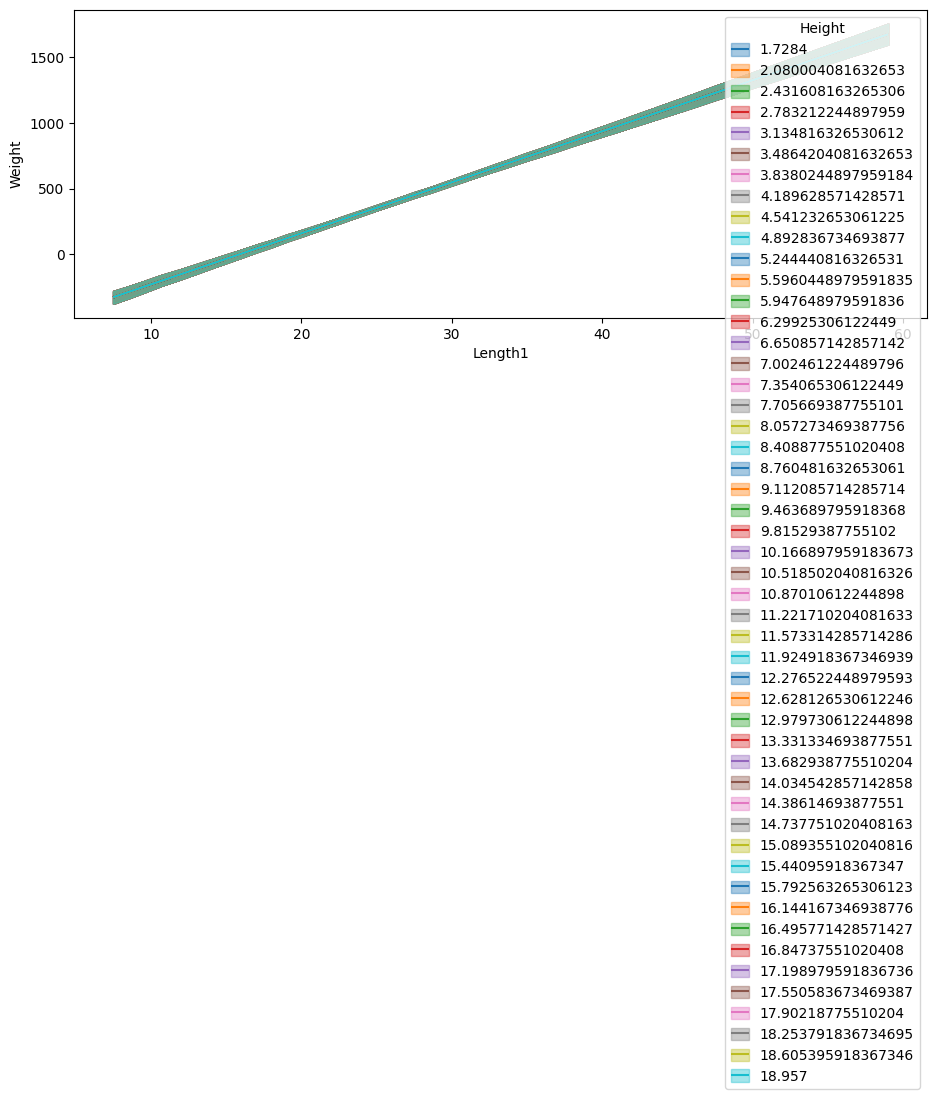

In [ ]:
bmb.interpret.plot_predictions(model2, idata2, ["Length1","Height"], fig_kwargs={"figsize":(11, 4)}, sample_new_groups=True)

Next, I created a model to predict the `Weight` of the fish using `Length1`, `Species`, and an interaction term between `Length1` and `Species`. The interaction term means that the effect of `Length1` on `Weight` can vary depending on the `Species`.

In [ ]:
model3 = bmb.Model("Weight ~ Length1 + Species + Length1:Species", data=data2_filtered)
idata3 = model3.fit(idata_kwargs={'log_likelihood': True})

(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='Length1', ylabel='Weight'>], dtype=object))

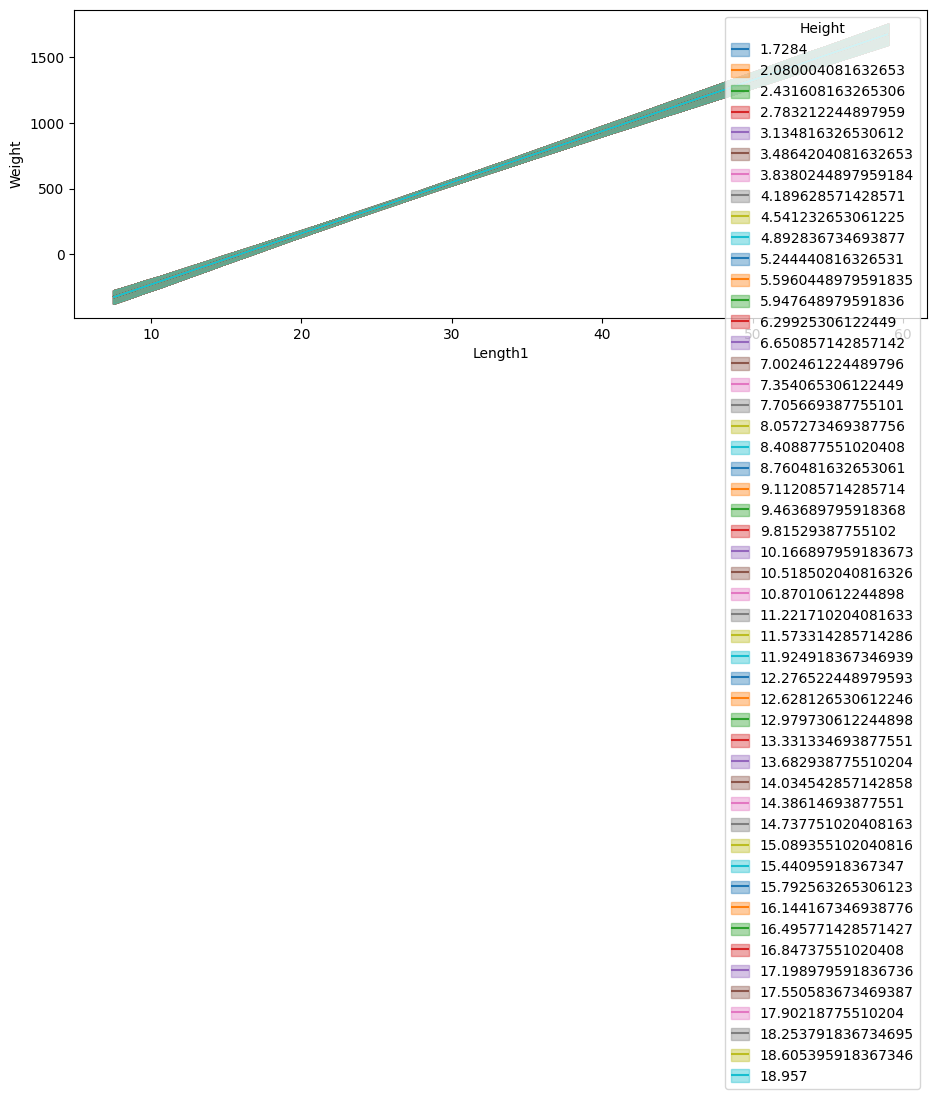

In [ ]:
bmb.interpret.plot_predictions(model3, idata3, ["Length1","Height"], fig_kwargs={"figsize":(11, 4)}, sample_new_groups=True)

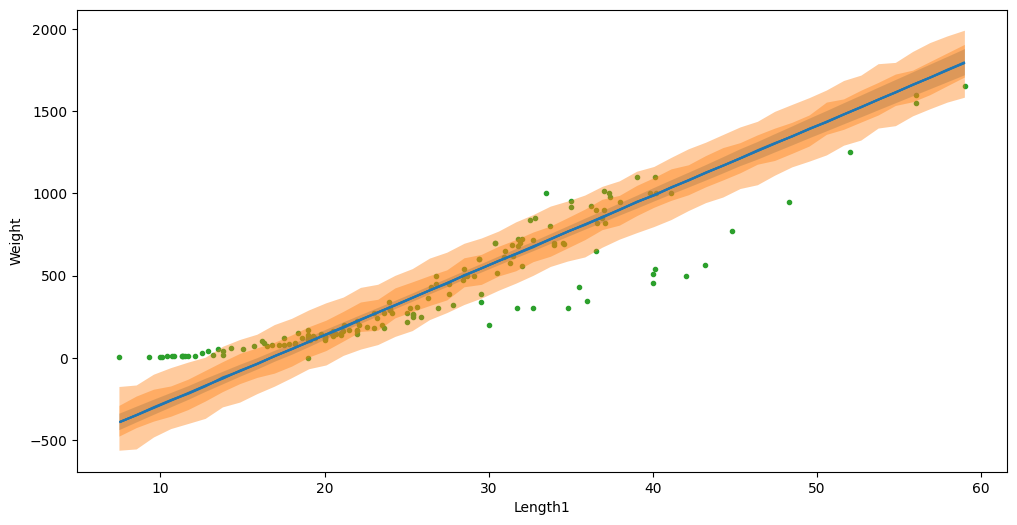

In [ ]:
# there's more code here so I could plot two HDIs
_, ax = plt.subplots(sharey=True, sharex="col", figsize=(12, 6))
#mean line
bmb.interpret.plot_predictions(model, idata, "Length1", ax=ax, fig_kwargs={"color":"k"})
#94% HDI
bmb.interpret.plot_predictions(model, idata, "Length1", pps=True, ax=ax)
#65% HDI
ax_ = bmb.interpret.plot_predictions(model, idata, "Length1", pps=True, ax=ax, prob=0.65)
ax_[1][0].get_children()[5].set_facecolor('C1')

#raw data
ax.plot(data2.Length1, data2.Weight, "C2.", zorder=-3)

This model (`model4`) predicts the `Weight` of the fish using `Length1` and `Species` as predictors, but it uses a Gamma distribution for the likelihood and a log link function. This is appropriate for positive, continuous, and skewed dependent variables like `Weight`.

In [ ]:
data2_filtered = data2[data2['Weight'] > 0].copy()
model4 = bmb.Model("Weight ~ Length1 + Species", data=data2_filtered, family='gamma', link='log')
idata4 = model4.fit(idata_kwargs={'log_likelihood': True})

(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='Length1', ylabel='Weight'>], dtype=object))

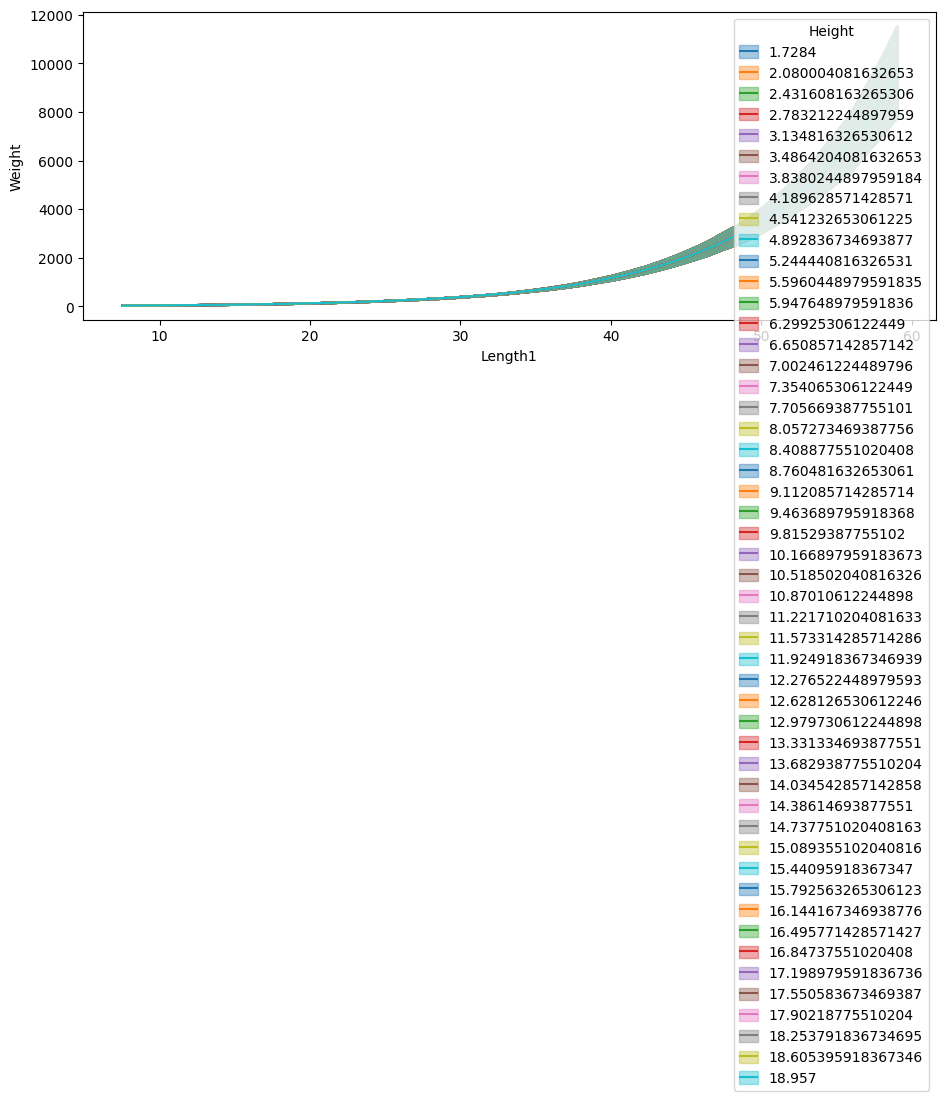

In [ ]:
bmb.interpret.plot_predictions(model4, idata4, ["Length1","Height"], fig_kwargs={"figsize":(11, 4)}, sample_new_groups=True)

#Comparison


In [ ]:
cmp_df_bmb = az.compare( {"model":idata,"model2":idata2,"model3":idata3,"model4":idata4} )
cmp_df_bmb

/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
model4,0,-853.718908,12.533583,0.000000,8.462913e-01,24.483883,0.000000,True,log
model3,1,-928.406021,13.841447,74.687114,2.595512e-02,13.637163,18.684689,True,log
model2,2,-928.727230,13.182253,75.008322,1.277536e-01,13.252389,18.808026,False,log
model,3,-953.226979,10.705344,99.508071,5.218048e-15,13.606923,18.079958,False,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

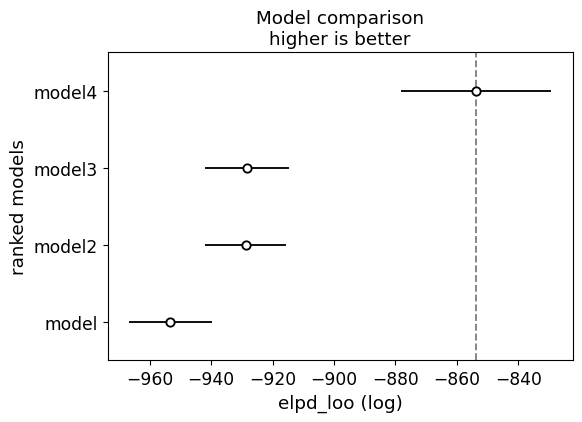

In [ ]:
az.plot_compare(cmp_df_bmb)

#Conclusion

Model 4 fits the best, probably because I used a Gamma distribution for this, which is good for predicting a positive, skewed dataset like weight. The other models used a normal distribution which doesn't work as well.
